## Teste de normalidade

In [2]:
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
data = pd.read_csv('iris.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (150, 5)


sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
1            4.9          3.0           1.4          0.2  Setosa
2            4.7          3.2           1.3          0.2  Setosa
3            4.6          3.1           1.5          0.2  Setosa
4            5.0          3.6           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
6            4.6          3.4           1.4          0.3  Setosa
7            5.0          3.4           1.5          0.2  Setosa
8            4.4          2.9           1.4          0.2  Setosa
9            4.9          3.1           1.5          0.1  Setosa
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8          4.0           1.2          0.2  Setosa
15           5.7          4.4           1.5          0.4  Setosa
16           5.4          3.9           1.3          0.4  Setosa
17           5.1          3.5           1.4          0.3  Setosa
18           5.7          3.8           1.7          0.3  Setosa
19           5.1          3.8           1.5          0.3  Setosa
20           5.4          3.4           1.7          0.2  Setosa
21           5.1          3.7           1.5          0.4  Setosa
22           4.6          3.6           1.0          0.2  Setosa
23           5.1          3.3           1.7          0.5  Setosa
24           4.8          3.4           1.9          0.2  Setosa

In [2]:
# Analisar se a coluna sepal.length tem distribuição normal

data = data.to_numpy()
x = data[:,3]
# normalidade test
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretação
alpha = 0.05
if p > alpha:
    print('Amostra Gaussiana (aceita H0)')
else:
    print('Amostra não Gausssiana (rejeita H0)')

Statistics=0.902, p=0.000
Amostra não Gausssiana (rejeita H0)


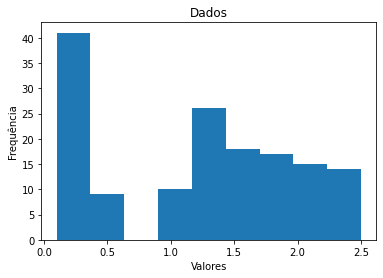

In [3]:
# Verificação atrav´s do histograma
plt.hist(x, bins = 'auto')
plt.title('Dados')
plt.ylabel('Frequência')
plt.xlabel('Valores')
plt.show()

## Teste de Hipotese

In [3]:
data = pd.read_csv('mtcars.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(25)

Número de linhas e colunas: (32, 12)


model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4  
15     3     4  
16     3     4  
17     4     1  
18     4     2  
19     4     1  
20     3     1  
21     3     2  
22     3     2  
23     3     4  
24     3     2

<AxesSubplot:>

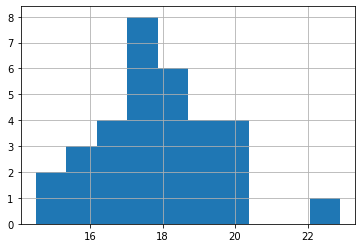

In [4]:
from scipy.stats import normaltest
significancia = 0.10
data.qsec.hist(bins = 10)

In [5]:
stat_test, p_valor = normaltest(data.qsec)
print(stat_test)
print(p_valor)

2.3779832698025456
0.30452818488979616


In [7]:
resultado=p_valor<=significancia 

In [8]:
print("Rejeitamos a hipotese nula:", resultado)

Rejeitamos a hipotese nula: False
